# Analysis of Marketing Strategy 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt
import os

# Reading the data

In [2]:
os.chdir("D:/Marketing Analytics projects")

In [3]:
df  = pd.read_csv("Campaign-Data.csv")
df

,Client ID,Client Type,Number of Customers,Montly Target,Zip Code,Calendardate,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition
0,ID-987275,Medium Facility,2800,125,1003,16-01-2014,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
1,ID-987275,Medium Facility,2800,125,1003,16-02-2014,3409460,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322500.0,Low
2,ID-987275,Medium Facility,2800,125,1003,18-03-2014,10228384,75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
3,ID-987275,Medium Facility,2800,125,1003,18-04-2014,17047304,123,0.0,0.0,0.0,0.0,3547500.0,1290000.0,0.0,0.0,Low
4,ID-987275,Medium Facility,2800,125,1003,19-05-2014,23866224,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971,ID-987463,Small Facility,800,20,1003,16-08-2015,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
2972,ID-987463,Small Facility,800,20,1003,16-09-2015,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,High
2973,ID-987463,Small Facility,800,20,1003,16-10-2015,0,0,0.0,0.0,0.0,0.0,0.0,2580000.0,0.0,0.0,High
2974,ID-987463,Small Facility,800,20,1003,16-11-2015,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,High


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Client ID              2976 non-null   object 
 1   Client Type            2976 non-null   object 
 2   Number of Customers    2976 non-null   int64  
 3   Montly Target          2976 non-null   int64  
 4   Zip Code               2976 non-null   int64  
 5   Calendardate           2976 non-null   object 
 6   Amount Collected       2976 non-null   int64  
 7   Unit Sold              2976 non-null   int64  
 8   Campaign (Email)       2976 non-null   float64
 9   Campaign (Flyer)       2976 non-null   float64
 10  Campaign (Phone)       2976 non-null   float64
 11  Sales Contact 1        2976 non-null   float64
 12  Sales Contact 2        2976 non-null   float64
 13  Sales Contact 3        2976 non-null   float64
 14  Sales Contact 4        2976 non-null   float64
 15  Sale

In [5]:
df['Client Type'].value_counts()

Large Facility      1368
Small Facility       840
Medium Facility      504
Private Facility     264
Name: Client Type, dtype: int64

# Questions to be answered:
## 1) What is the impact of each Campaign strategy and sales visit on Amount Collected?
## 2) Is the same strategy valid for all the different client types ?


# Feature Additions

In [6]:
df['Calendardate'] = pd.to_datetime(df['Calendardate'])
df['Cal_Month'] = df['Calendardate'].dt.month
df['Cal_Year'] = df['Calendardate'].dt.year

In [7]:
df.head()

,Client ID,Client Type,Number of Customers,Montly Target,Zip Code,Calendardate,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition,Cal_Month,Cal_Year
0,ID-987275,Medium Facility,2800,125,1003,2014-01-16,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,1,2014
1,ID-987275,Medium Facility,2800,125,1003,2014-02-16,3409460,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322500.0,Low,2,2014
2,ID-987275,Medium Facility,2800,125,1003,2014-03-18,10228384,75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,3,2014
3,ID-987275,Medium Facility,2800,125,1003,2014-04-18,17047304,123,0.0,0.0,0.0,0.0,3547500.0,1290000.0,0.0,0.0,Low,4,2014
4,ID-987275,Medium Facility,2800,125,1003,2014-05-19,23866224,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,5,2014


# Exploratory Data Analysis and Statistical Analysis

# Exploring and Understanding basics data

### Distribution of Data across different Client type
### Difference of Sales in Account Types (Using Categorical Mean)

# Statistical Analysis - Impact of Marketing Strategy on Sales (Using Correlation, Regression)
# Impact of Competition on Sales

## Distribution of client types

In [8]:
df['Client Type'].value_counts(normalize = True)

Large Facility      0.459677
Small Facility      0.282258
Medium Facility     0.169355
Private Facility    0.088710
Name: Client Type, dtype: float64

In [9]:
pd.crosstab(df['Number of Competition'], df['Client Type'], margins=True, normalize='columns')

Client Type,Large Facility,Medium Facility,Private Facility,Small Facility,All
Number of Competition,,,,,
High,0.166667,0.166667,0.166667,0.166667,0.166667
Low,0.833333,0.833333,0.833333,0.833333,0.833333


### There is no effect of competition in the client types

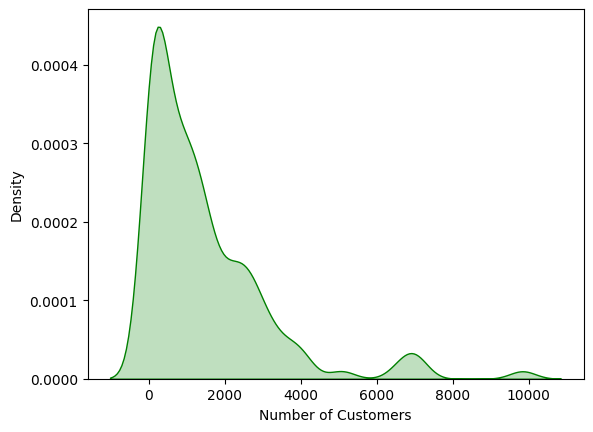

In [10]:
sns.kdeplot(df['Number of Customers'],color='green', fill=True)
plt.show()

In [11]:
df.groupby('Number of Competition').mean()

,Number of Customers,Montly Target,Zip Code,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Cal_Month,Cal_Year
Number of Competition,,,,,,,,,,,,,,,
High,1456.935484,75.080645,1003.0,2.974789e+07,213.127016,105398.938508,994046.717540,45198.036895,146945.564516,2.685333e+06,1.786754e+06,72172.379032,8452.620968,10.5,2015.0
Low,1456.935484,75.080645,1003.0,1.445570e+07,103.132258,150862.165766,623692.979839,26693.304194,128219.758065,1.890916e+06,1.883634e+06,70481.854839,15864.919355,5.7,2014.4


In [12]:
df.groupby('Client Type').mean()

,Number of Customers,Montly Target,Zip Code,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Cal_Month,Cal_Year
Client Type,,,,,,,,,,,,,,,
Large Facility,1380.842105,71.578947,1003.0,1.999880e+07,143.098684,142273.609649,8.192056e+05,45595.436623,133667.763158,2.034013e+06,2.017039e+06,119287.280702,16266.447368,6.5,2014.5
Medium Facility,3940.761905,202.857143,1003.0,4.075997e+07,290.583333,437217.097817,1.552603e+06,49176.847619,398645.833333,4.822783e+06,4.698646e+06,85104.166667,33273.809524,6.5,2014.5
Private Facility,400.727273,20.454545,1003.0,5.030246e+06,35.784091,5183.715152,2.272919e+05,5522.470455,1221.590909,6.376705e+05,4.434375e+05,3664.772727,12215.909091,6.5,2014.5
Small Facility,422.514286,21.285714,1003.0,1.637759e+06,11.689286,11975.986310,9.120875e+04,0.000000,8062.500000,7.617143e+05,3.727946e+05,4223.214286,1535.714286,6.5,2014.5


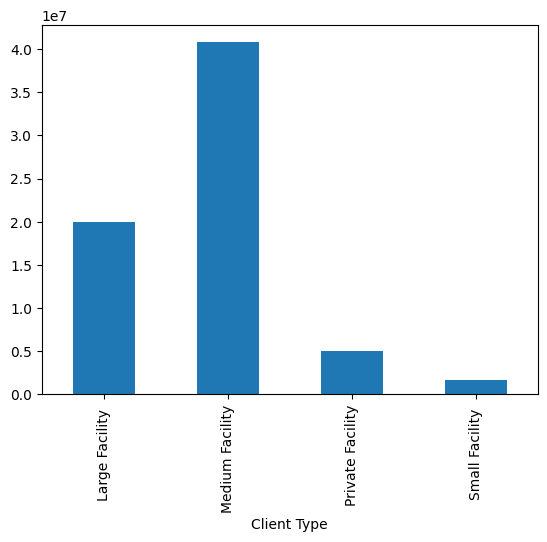

In [13]:
df.groupby('Client Type')['Amount Collected'].mean().plot(kind='bar')
plt.show()

### As we can see The Medium Facility is Generating more revenue as compared to other facilities so we will be intresting in knowing more about the marketing strategy used by Medium facility. 

# Correlation Analysis

In [14]:
df.corr()[['Amount Collected']]

,Amount Collected
Number of Customers,0.607496
Montly Target,0.608204
Zip Code,NaN
Amount Collected,1.000000
Unit Sold,0.997515
Campaign (Email),0.248235
Campaign (Flyer),0.444337
Campaign (Phone),0.034858
Sales Contact 1,0.277478
Sales Contact 2,0.552112


In [15]:
cor_analysis = df.loc[: ,'Amount Collected' : 'Sales Contact 5' ].drop('Unit Sold', axis = 1)
cm = sns.light_palette("green", as_cmap = True)
cor_analysis = cor_analysis.corr().round(2)['Amount Collected'].reset_index()
cor_analysis.columns = ['Impacting Variables', 'Degree of impact (Correlation)']
cor_analysis = cor_analysis[ cor_analysis['Impacting Variables'] != 'Amount Collected']    
cor_analysis = cor_analysis.sort_values(by= 'Degree of impact (Correlation)', ascending = False )

cor_analysis.style.background_gradient(cmap = cm)

,Impacting Variables,Degree of impact (Correlation)
5,Sales Contact 2,0.550000
2,Campaign (Flyer),0.440000
6,Sales Contact 3,0.360000
4,Sales Contact 1,0.280000
1,Campaign (Email),0.250000
7,Sales Contact 4,0.240000
8,Sales Contact 5,0.100000
3,Campaign (Phone),0.030000


# Corelations broken down by Client type

In [16]:

cor_analysis=pd.DataFrame(df.groupby('Client Type')[['Amount Collected',
       'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
       'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
       'Sales Contact 4', 'Sales Contact 5']].corr().round(2)['Amount Collected']).reset_index()

cm = sns.light_palette("blue", as_cmap = True)
cor_analysis.columns = ['Client Type', 'Impacting Variables', 'Degree of impact (Correlation)']
cor_analysis = cor_analysis.sort_values(by= ['Client Type' , 'Degree of impact (Correlation)'] , ascending = False )

cor_analysis = cor_analysis[ cor_analysis['Impacting Variables'] != 'Amount Collected'].reset_index(drop =True)    

cor_analysis.style.background_gradient(cmap = cm)

,Client Type,Impacting Variables,Degree of impact (Correlation)
0,Small Facility,Sales Contact 2,0.220000
1,Small Facility,Sales Contact 3,0.070000
2,Small Facility,Campaign (Email),0.060000
3,Small Facility,Campaign (Flyer),0.040000
4,Small Facility,Sales Contact 4,0.020000
5,Small Facility,Sales Contact 5,0.000000
6,Small Facility,Sales Contact 1,-0.020000
7,Small Facility,Campaign (Phone),nan
8,Private Facility,Sales Contact 2,0.570000
9,Private Facility,Campaign (Flyer),0.280000


# "Sales Contact 2" variable is highly correlated with the Amounts collected 

# Applying Regression Analysis

In [27]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

df.columns = [s.replace(" ", "_")  for s in df.columns ]
df.columns = [s.replace("(", "")  for s in df.columns ]
df.columns = [s.replace(")", "")  for s in df.columns ]



model = smf.ols ('Amount_Collected ~ Campaign_Email + Campaign_Flyer + Campaign_Phone + Sales_Contact_1+\
                 Sales_Contact_1 + Sales_Contact_2 + Sales_Contact_3 + Sales_Contact_4 + Sales_Contact_5 ',
                 data = df ).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Amount_Collected   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     342.1
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        10:41:34   Log-Likelihood:                -54512.
No. Observations:                2976   AIC:                         1.090e+05
Df Residuals:                    2967   BIC:                         1.091e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.481e+06   5.12e+05     

# ANOVA (Analysis of Variance)

In [28]:
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                       sum_sq      df           F         PR(>F)
Campaign_Email   8.436506e+14     1.0    1.766794   1.838816e-01
Campaign_Flyer   7.861829e+16     1.0  164.644321   1.017277e-36
Campaign_Phone   2.319349e+12     1.0    0.004857   9.444420e-01
Sales_Contact_1  4.975136e+16     1.0  104.190506   4.570046e-24
Sales_Contact_2  3.785149e+17     1.0  792.695174  8.858664e-155
Sales_Contact_3  1.534316e+17     1.0  321.320074   2.639060e-68
Sales_Contact_4  5.095969e+16     1.0  106.721025   1.331521e-24
Sales_Contact_5  2.839121e+14     1.0    0.594575   4.407166e-01
Residual         1.416754e+18  2967.0         NaN            NaN


## this ANOVA table suggests that Campaign_Flyer, Sales_Contact_1, Sales_Contact_2, and Sales_Contact_3 are the most important factors for predicting the Amount_Collected variable in the model.

In [18]:
df2 = pd.read_html(model.summary().tables[1].as_html(),header=0,index_col=0)[0]

In [19]:
df2

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.481000e+06,512000.000,2.891,0.004,477000.000,2490000.000
Campaign_Email,7.932000e-01,0.597,1.329,0.184,-0.377,1.963
Campaign_Flyer,3.337600e+00,0.260,12.831,0.000,2.828,3.848
Campaign_Phone,7.340000e-02,1.053,0.070,0.944,-1.991,2.137
Sales_Contact_1,4.236800e+00,0.415,10.207,0.000,3.423,5.051
Sales_Contact_2,3.638200e+00,0.129,28.155,0.000,3.385,3.892
Sales_Contact_3,2.343200e+00,0.131,17.925,0.000,2.087,2.600
Sales_Contact_4,1.094780e+01,1.060,10.331,0.000,8.870,13.026
Sales_Contact_5,3.507800e+00,4.549,0.771,0.441,-5.412,12.428


In [20]:
# df2 = df2.reset_index()

df2 = df2[df2['P>|t|'] < 0.05] 
df2

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.481000e+06,512000.000,2.891,0.004,477000.000,2490000.000
Campaign_Flyer,3.337600e+00,0.260,12.831,0.000,2.828,3.848
Sales_Contact_1,4.236800e+00,0.415,10.207,0.000,3.423,5.051
Sales_Contact_2,3.638200e+00,0.129,28.155,0.000,3.385,3.892
Sales_Contact_3,2.343200e+00,0.131,17.925,0.000,2.087,2.600
Sales_Contact_4,1.094780e+01,1.060,10.331,0.000,8.870,13.026


# Regression Analysis - Broken for different account types

In [31]:
consolidated_summary=pd.DataFrame()
for acctype in list(set(list(df['Client_Type']))):
    temp_data=df[df['Client_Type']==acctype].copy()
    results = smf.ols('Amount_Collected ~ Campaign_Email+Campaign_Flyer+Campaign_Phone+\
       Sales_Contact_1 + Sales_Contact_2 + Sales_Contact_3+Sales_Contact_4 + Sales_Contact_5', data=temp_data).fit()
    df3 = pd.read_html(results.summary().tables[1].as_html(),header=0,index_col=0)[0].reset_index()
    df3=df3[df3['P>|t|']<0.05][['index','coef']]
    df3.columns=['Variable','Coefficent (Impact)']
    df3['Account Type']=acctype
    df3=df3.sort_values('Coefficent (Impact)',ascending=False)
    df3=df3[df3['Variable']!='Intercept']
    print(acctype)
    consolidated_summary=consolidated_summary.append(df3)
    print(df3)
    #print(results.summary())

Medium Facility
          Variable  Coefficent (Impact)     Account Type
2   Campaign_Flyer               4.1059  Medium Facility
5  Sales_Contact_2               3.5778  Medium Facility
4  Sales_Contact_1               3.1365  Medium Facility
6  Sales_Contact_3               2.1174  Medium Facility
Small Facility 
          Variable  Coefficent (Impact)     Account Type
5  Sales_Contact_2             0.810100  Small Facility 
3   Campaign_Phone            -0.000003  Small Facility 
Private Facility
          Variable  Coefficent (Impact)      Account Type
5  Sales_Contact_2               6.6223  Private Facility
Large Facility 
          Variable  Coefficent (Impact)     Account Type
4  Sales_Contact_1              11.6731  Large Facility 
7  Sales_Contact_4              10.6145  Large Facility 
5  Sales_Contact_2               4.0031  Large Facility 
2   Campaign_Flyer               2.7204  Large Facility 
6  Sales_Contact_3               2.0316  Large Facility 
3   Campaign_Phone   

In [32]:
consolidated_summary

,Variable,Coefficent (Impact),Account Type
2,Campaign_Flyer,4.105900,Medium Facility
5,Sales_Contact_2,3.577800,Medium Facility
4,Sales_Contact_1,3.136500,Medium Facility
6,Sales_Contact_3,2.117400,Medium Facility
5,Sales_Contact_2,0.810100,Small Facility
3,Campaign_Phone,-0.000003,Small Facility
5,Sales_Contact_2,6.622300,Private Facility
4,Sales_Contact_1,11.673100,Large Facility
7,Sales_Contact_4,10.614500,Large Facility
5,Sales_Contact_2,4.003100,Large Facility


In [33]:
consolidated_summary.reset_index(inplace=True)
consolidated_summary.drop('index',inplace=True,axis=1)

In [34]:
consolidated_summary.columns = ['Variable','Return on Investment','Account Type']
consolidated_summary['Return on Investment']= consolidated_summary['Return on Investment'].apply(lambda x: round(x,1))
consolidated_summary.style.background_gradient(cmap='RdYlGn')

,Variable,Return on Investment,Account Type
0,Campaign_Flyer,4.100000,Medium Facility
1,Sales_Contact_2,3.600000,Medium Facility
2,Sales_Contact_1,3.100000,Medium Facility
3,Sales_Contact_3,2.100000,Medium Facility
4,Sales_Contact_2,0.800000,Small Facility
5,Campaign_Phone,-0.000000,Small Facility
6,Sales_Contact_2,6.600000,Private Facility
7,Sales_Contact_1,11.700000,Large Facility
8,Sales_Contact_4,10.600000,Large Facility
9,Sales_Contact_2,4.000000,Large Facility


In [35]:
def format(x):
        return "${:.1f}".format(x)
consolidated_summary['Return on Investment']  = consolidated_summary['Return on Investment'].apply(format)

In [37]:
consolidated_summary.style.background_gradient(cmap='RdYlGn')

,Variable,Return on Investment,Account Type
0,Campaign_Flyer,$4.1,Medium Facility
1,Sales_Contact_2,$3.6,Medium Facility
2,Sales_Contact_1,$3.1,Medium Facility
3,Sales_Contact_3,$2.1,Medium Facility
4,Sales_Contact_2,$0.8,Small Facility
5,Campaign_Phone,$-0.0,Small Facility
6,Sales_Contact_2,$6.6,Private Facility
7,Sales_Contact_1,$11.7,Large Facility
8,Sales_Contact_4,$10.6,Large Facility
9,Sales_Contact_2,$4.0,Large Facility


# Final Recommendations

### Using the above table we can use the coefficent to see how much return we can derive from each dollar we spend, here we can clearly see that for different account type different Campaigns and Different Sales Contact are effective with different extend.

### Case Explanation of Medium Facility 
### Medium Facility shows decent results with Flyer Campiagns and each dollar spend the expected return is 4 dollars on average. Sales Contact 2 is highly effective followed by Sales Contact 1 and Sales Contact 3. Else all other strategy shows no impact can be dropped to save cost.